# CS181/DA210 Final Project
# Exploring the Box Office Charts
## Part Two: Data Analysis
## By Ichhit Joshi



---

In [20]:
#importing required libraries

import os
import io
import sys
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

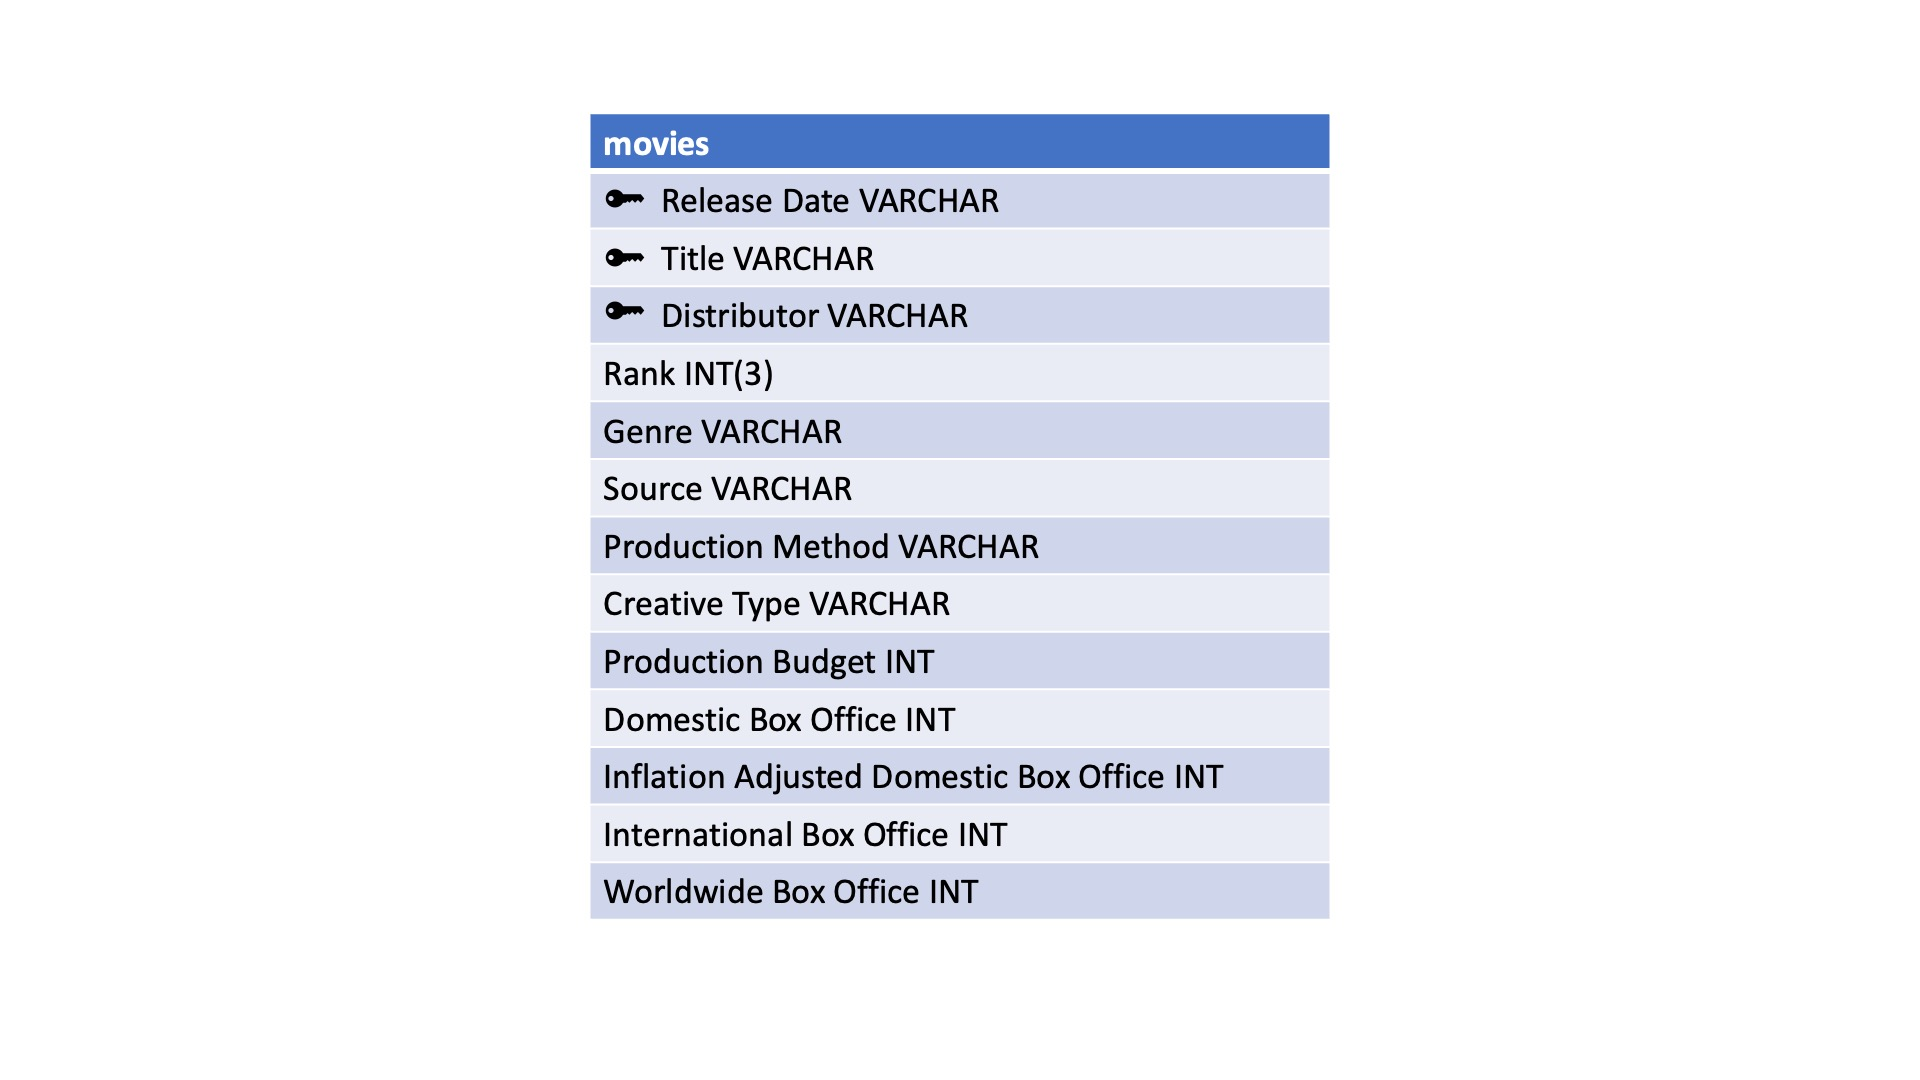

In [21]:
from IPython.display import Image
Image("schema.jpg", width=1920, height=1080)

The database I'm working with for the project is a database related to the box office revenues of movies released in the theaters from the year 1995 to 2022. It contains the theatrical distributors, production budget, genre, domestic box office revenue, international box office revenue, and worldwide box office revenue of all the top 100 highest grossing movies from the years 1995 through 2022. <br>



I just have one entity called movies. The primary keys(composite key) to uniquely identify a row in the database are a combination of Release Date, Title, and Distributor. 

This is the functional dependency of the database:

<b>movies table:</b> <br>
Release Date, Title, Distributor -> Rank, Source, Production Method, Creative Type, Production Budget, Domestic Box Office, Inflation Adjusted Domestic Box Office, International Box Office, Worldwide Box Office

Now that we have the database ready, I will be answering some of my central questions for the project using SQL queries.

---

First, we need some functions in order to get the appropriate sqllite credentials and setup connection to the database. This will allow us to run any SQL queries to the database.

In [22]:
import json
import sqlalchemy as sa

def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]


def buildConnectionString(source):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [23]:
# Build the conection string
cstring = buildConnectionString("sqlite_movie")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///./dbfiles/movie.db


Now that we've established a connection to the database, we can start constructing queries to read the database table into python with pandas. First, let's try to get the whole SQL movies database into a pandas DataFrame just to check if everything's there.

In [24]:
df = pd.read_sql_table("movies", connection)

df = df.set_index(['Release Date', 'Title', 'Distributor'])
df

/Users/ichhit/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:1776: SAWarning: Could not instantiate type <class 'sqlalchemy.sql.sqltypes.INTEGER'> with reflected arguments ['3']; using no arguments.
  tbl = Table(


,,,Rank,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office
Release Date,Title,Distributor,,,,,,,,,,
"Nov 22, 1995",Toy Story,Walt Disney,1,Adventure,Original Screenplay,Digital Animation,Kids Fiction,30000000,192523233,403493031,172747718,365270951
"Jun 16, 1995",Batman Forever,Warner Bros.,2,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,100000000,184031112,387946038,152498032,336529144
"Jun 30, 1995",Apollo 13,Universal,3,Drama,Based on Factual Book/Article,Live Action,Dramatization,65000000,173772767,365379356,162029504,335802271
"Jun 10, 1995",Pocahontas,Walt Disney,4,Adventure,Based on Real Life Events,Hand Animation,Historical Fiction,55000000,141579773,298455715,205520227,347100000
"Nov 10, 1995",Ace Ventura: When Nature Calls,Warner Bros.,5,Comedy,Original Screenplay,Live Action,Contemporary Fiction,30000000,108360063,228294825,104039937,212400000
...,...,...,...,...,...,...,...,...,...,...,...,...
"Jun 3, 2022",Watcher,IFC Midnight,96,Thriller/Suspense,Original Screenplay,Live Action,Contemporary Fiction,0,1961207,1961207,1130,1962337
"Jul 1, 2022",Mr. Malcolm’s List,Bleecker Street,97,Romantic Comedy,Based on Fiction Book/Short Story,Live Action,Historical Fiction,0,1885720,1885720,138774,2024494
"Feb 25, 2022",2022 Oscar Shorts,ShortsHD,98,Multiple Genres,Compilation,Multiple Production Methods,Multiple Creative Types,0,1801646,1801646,0,1801646


We can see that the table looks just like it did before exporting it as a SQL database. So, everything is still intact.

<b>Filtering out 2022 Data </b>

Now, let's try running an SQL query to filter out data for a specific year, 2022. There is no column that has just the year. But, the Release Date column has the date in the format {Month Date, Year}. So, we can use the WHERE and LIKE statement to check if the Release Date contains 2022 in it.

In [25]:
query2 = """
    SELECT *
    FROM movies
    WHERE [Release Date] LIKE '%2022'
"""
df2 = pd.read_sql_query(query2, connection)
df2 = df2.set_index(['Release Date', 'Title', 'Distributor'])
df2

,,,Rank,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office
Release Date,Title,Distributor,,,,,,,,,,
"May 27, 2022",Top Gun: Maverick,Paramount Pictures,1,Action,Original Screenplay,Live Action,Contemporary Fiction,170000000,716640767,716640767,769100000,1485740767
"May 6, 2022",Doctor Strange in the Multiverse of M…,Walt Disney,2,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,200000000,411331607,411331607,540893379,952224986
"Jun 10, 2022",Jurassic World: Dominion,Universal,3,Action,Original Screenplay,Live Action,Science Fiction,165000000,376009080,376009080,624582231,1000591311
"Mar 1, 2022",The Batman,Warner Bros.,4,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,200000000,369345583,369345583,398217353,767562936
"Jul 1, 2022",Minions: The Rise of Gru,Universal,5,Comedy,Spin-Off,Digital Animation,Kids Fiction,80000000,369041305,369041305,565680998,934722303
...,...,...,...,...,...,...,...,...,...,...,...,...
"Jun 3, 2022",Watcher,IFC Midnight,96,Thriller/Suspense,Original Screenplay,Live Action,Contemporary Fiction,0,1961207,1961207,1130,1962337
"Jul 1, 2022",Mr. Malcolm’s List,Bleecker Street,97,Romantic Comedy,Based on Fiction Book/Short Story,Live Action,Historical Fiction,0,1885720,1885720,138774,2024494
"Feb 25, 2022",2022 Oscar Shorts,ShortsHD,98,Multiple Genres,Compilation,Multiple Production Methods,Multiple Creative Types,0,1801646,1801646,0,1801646


This is resulted in a dataframe of just the data for the year 2022. We can see that there are only 100 rows of data.

## Answering the Central Questions:

Now that we're familiar with sql queries in python, we can move onto answering our central questions. Let's start with the first one:

<b>How have the box office revenues of movies changed over the years from 1995 to 2022? </b><br>

Movie theaters have always been the major source of entertainment for millions of people across the globe and it's also the core source of income for the production companies that produce the movies. Production companies, being profit-oriented, will always try to maximize the profits they can earn from the box office. <br>

Now, with the rise of streaming services, it is interesting to see if there has been any decline of box office revenues in recent years. Are people still going to the theaters to watch movies? <br>

I believe that the box office revenues are declining. Let's find out!

For this query, I will have to get the sum of the worldwide box office revenue for every year. So, I will have to group all the same years together and add the revenue for every group/year. Since I don't have a Year column to group by, I will have to create one using SUBSTRING to get the year from the Release Date column.

In [26]:
query3 = """
    SELECT SUBSTRING([Release Date], LENGTH([Release Date])-3, 4) as Year, 
    SUM([Worldwide Box Office]) as [Total Worldwide Box Office]
    FROM movies
    GROUP BY Year
"""

df3 = pd.read_sql_query(query3, connection)
df3

,Year,Total Worldwide Box Office
0,1995,9190979561
1,1996,9264139289
2,1997,12208386576
3,1998,10775379263
4,1999,12462932348
5,2000,12229858776
6,2001,13915864875
7,2002,15071223564
8,2003,16156635063
9,2004,16833357968


We have got a table with the data we need. But, it's better to answer the question visually through a plot. The plot will show us how the revenue has changed. For this, we will need to use the matplotlib library to make a line chart.

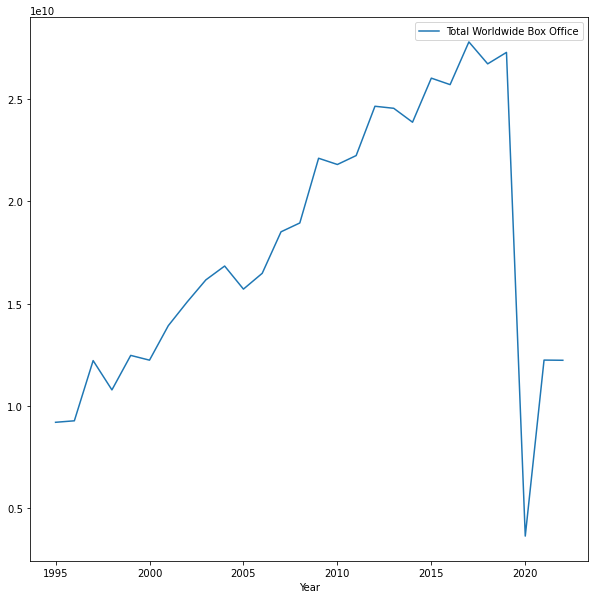

In [27]:
df3.plot(x="Year", y = "Total Worldwide Box Office", kind= "line", figsize=(10,10))
plt.show()

From the graph, we can see that overall the revenue has increased from 1995 (USD 9.2 Billion) up until 2019 (USD 27.3 Billion) after hitting a peak on 2017 (USD 27.8 Billion). That's an almost 3x increase from 1995. Then, we see a crazy dip in numbers right after 2019, in the year 2020 (USD 3.6 Billion). I wonder what happened there?

That is when the Covid-19 pandemic hit! People weren't making much movies, all the cinemas were shut down, and people were locked in. That was when streaming movies became really popular. 

In 2020, the total worldwide box office revenue fell even lower than the total box office revenue in 1995. The impact can be seen in the graph. It's clear that the movie industry, like other industries got hit hard by the pandemic.

After 2020, as the world is recovering and opening up, we can see in the graph that the numbers are gradually increasing again. But, still the numbers are very low compared to pre-pandemic time period. 

<b>What are the top 10 most expensive movies ever made from 1995 to 2022? </b>

Just for fun, I wanted to see which movies had the highest budget ever and what the amount was. For this, I can just run a simple SQL query and sort by the Production Budget in descending order.

In [28]:
query4 = """
    SELECT *
    FROM movies
    ORDER BY [Production Budget] DESC
    LIMIT 10
"""

df4 = pd.read_sql_query(query4, connection)
df4 = df4.set_index(['Release Date', 'Title', 'Distributor'])
df4

,,,Rank,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office
Release Date,Title,Distributor,,,,,,,,,,
"Apr 26, 2019",Avengers: Endgame,Walt Disney,1,Action,Based on Comic/Graphic Novel,Animation/Live Action,Super Hero,400000000,858373000,859310090,1939359053,2797732053
"May 20, 2011",Pirates of the Caribbean: On Stranger…,Walt Disney,5,Adventure,Based on Theme Park Ride,Live Action,Historical Fiction,379000000,241071802,278767771,804642000,1045713802
"May 1, 2015",Avengers: Age of Ultron,Walt Disney,3,Action,Based on Comic/Graphic Novel,Animation/Live Action,Super Hero,365000000,459005868,499298192,936311111,1395316979
"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,Walt Disney,1,Adventure,Original Screenplay,Animation/Live Action,Science Fiction,306000000,936662225,1013504282,1127953592,2064615817
"May 24, 2007",Pirates of the Caribbean: At World’…,Walt Disney,4,Adventure,Based on Theme Park Ride,Live Action,Historical Fiction,300000000,309420425,412410645,651576067,960996492
"Nov 6, 2015",Spectre,Sony Pictures,10,Action,Based on Fiction Book/Short Story,Live Action,Contemporary Fiction,300000000,200074175,217554820,679003169,879077344
"Nov 17, 2017",Justice League,Warner Bros.,10,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,300000000,229024295,234076098,426920914,655945209
"Apr 27, 2018",Avengers: Infinity War,Walt Disney,2,Action,Based on Comic/Graphic Novel,Animation/Live Action,Super Hero,300000000,678815482,683286273,1369544272,2048359754
"May 25, 2018",Solo: A Star Wars Story,Walt Disney,12,Adventure,Spin-Off,Animation/Live Action,Science Fiction,275000000,213767512,215175416,179383835,393151347


From the table, we can see that Avengers: Endgame, released in April 26, 2019, aruguably one of the most popular superhero movies distributed by Walt Disney, is the most expensive movie ever made. It had a budget of a whopping $400 Million US Dollars. 

I noticed that most of the movies in the list were superhero movies with a lot of visual effects in them. This means a lot of money goes into making such movies.

Also, most of them are distributed by Walt Disney, which I found pretty interesting.

<b>What are the top 10 all-time highest grossing movies and what were their profits? </b>

In the previous question, we saw what the most expensive movies were. But, just because you invested crazy amount of money doesn't guarantee that you get a similar return. How a movie performs in the box office is based of the profit it gains from the box office revenue minus their investment. Now, we will see which movies got the best bang for their buck and made the most profit ever.

For this we will need to calculate a new profit column simply by subtracting the production budget from the worldwide box office of a movie.

In [29]:
query5 = """
    SELECT *, ([Worldwide Box Office] - [Production Budget]) as Profit
    FROM movies
    ORDER BY Profit DESC
    LIMIT 10
"""

df5 = pd.read_sql_query(query5, connection)
df5 = df5.set_index(['Release Date', 'Title', 'Distributor'])
df5

,,,Rank,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office,Profit
Release Date,Title,Distributor,,,,,,,,,,,
"Dec 18, 2009",Avatar,20th Century Fox,1,Action,Original Screenplay,Animation/Live Action,Science Fiction,237000000,785221649,929879724,2125062453,2910284102,2673284102
"Apr 26, 2019",Avengers: Endgame,Walt Disney,1,Action,Based on Comic/Graphic Novel,Animation/Live Action,Super Hero,400000000,858373000,859310090,1939359053,2797732053,2397732053
"Dec 19, 1997",Titanic,Paramount Pictures,1,Drama,Original Screenplay,Live Action,Historical Fiction,200000000,659363944,1248772370,1548622601,2207986545,2007986545
"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,Walt Disney,1,Adventure,Original Screenplay,Animation/Live Action,Science Fiction,306000000,936662225,1013504282,1127953592,2064615817,1758615817
"Apr 27, 2018",Avengers: Infinity War,Walt Disney,2,Action,Based on Comic/Graphic Novel,Animation/Live Action,Super Hero,300000000,678815482,683286273,1369544272,2048359754,1748359754
"Dec 17, 2021",Spider-Man: No Way Home,Sony Pictures,1,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,200000000,814108407,814108407,1095933175,1910041582,1710041582
"Jun 12, 2015",Jurassic World,Universal,2,Action,Based on Fiction Book/Short Story,Live Action,Science Fiction,215000000,652306625,709564064,1017657016,1669963641,1454963641
"Jul 19, 2019",The Lion King,Walt Disney,2,Adventure,Remake,Animation/Live Action,Kids Fiction,260000000,543638043,544231531,1104095595,1647733638,1387733638
"Apr 3, 2015",Furious 7,Universal,5,Action,Original Screenplay,Live Action,Contemporary Fiction,190000000,353007020,383994584,1161546466,1514553486,1324553486


With this list, now we know that Avatar, released in December 18, 2009 is the highest grossing movie ever made. The movie was distributed by 20th Century Fox and obviously ranked #1 in the 2009 data. Avatar is a science fiction action movie with a lot of vfx. With a budget of USD 237 million, the movie managed to earn USD 2.9 Billion, finally making a profit of USD 2.7 Billion.

Avatar isn't even in the list of the top 10 most expensive movies ever and it still managed to make the highest profit out of all the movies. This is pretty impressive. This just goes to show that just investing a lot of money in a movie won't guarantee it's box office success.

Avengers: Endgame, the most expensive movie ever made, comes in second place with a profit of USD 2.4 Billion. Spending all that money was worth it after all, huh?

A trend that I noticed is that in this list too, almost all of them are fictional super hero movies that can be watched by any age group and are mostly Action or Adventure movies. All of them atleast have a budget of USD 100 Million.

So, I guess in general, fictional movies or super hero movies tend to be more expensive but also yield a great return. This could be something movie creators should look into if they want the best bang for their buck.

<b>What is the most profitable genre of movie to produce? </b>

Are superhero and fictional movies with a lot of action and adventure making the most profit in the box office? If there is any significant proof that a specific genre can make the most money, this would help companies to focus on what type of content to create for the audience. <br>

For this, I will just group the movies together by their genre and add up all of the profit for the group.

In [30]:
query6 = """
    SELECT Genre, COUNT(*) as Movies, SUM(Profit) as [Total Genre Profit]
    FROM (SELECT *, ([Worldwide Box Office] - [Production Budget]) as Profit
    FROM movies)
    GROUP BY Genre
    ORDER BY [Total Genre Profit] DESC
"""
df6 = pd.read_sql_query(query6, connection)
df6

,Genre,Movies,Total Genre Profit
0,Adventure,516,112760289021
1,Action,444,92979359979
2,Drama,496,39696910711
3,Comedy,475,34268370457
4,Thriller/Suspense,297,24816147460
5,Horror,259,19638095230
6,Romantic Comedy,162,13383285106
7,Musical,40,7515486199
8,Black Comedy,48,2487336079
9,Documentary,30,1903304013


We can see that 516 out of all the movies in the database are Adventure movies and they made the most total profit of USD 112 Billion. Up next, Action movies are also pretty profitable.

The above list also shows the most popular genres that the audience enjoy. Action, Drama and Comedy movies are pretty famous among the audience, whereas, musicals, westerns, and documentaries not much.

Movie creators can have some idea from the above table to know what their next project could be if they want to maximize their profit.

<b>Which movie distributor has made the most profit over the years?</b>

Now, let's see which movie distributor is currently at the top of their game with the most profit from 1995 to 2022. Also, let's see how much they have invested in movies compared to the profit they have earned.

For this, I will just group by distributor and add all the profits by group.

In [31]:
query7 = """
    SELECT Distributor, COUNT(*) as Movies, SUM(Profit) as [Total Distributor Profit], SUM([Production Budget]) as [Total Production Budget]
    FROM (SELECT *, ([Worldwide Box Office] - [Production Budget]) as Profit
    FROM movies)
    GROUP BY Distributor
    ORDER BY [Total Distributor Profit] DESC
"""
df7 = pd.read_sql_query(query7, connection)
df7

,Distributor,Movies,Total Distributor Profit,Total Production Budget
0,Walt Disney,299,67688976806,25313228700
1,Warner Bros.,400,55404405711,27312572729
2,Universal,334,46140892015,18558930000
3,20th Century Fox,271,43964485024,16797600000
4,Sony Pictures,392,43107278417,20442880000
...,...,...,...,...
91,HEFG Releasing,1,-606340,3500000
92,Well Go USA,2,-5618205,8000000
93,Amazon Studios,1,-6734881,8000000
94,Briarcliff Entertainment,1,-12982904,29000000


Walt Disney, Warner Bros, Universal Studios, 20th Century Fox, and Sony Pictures!
They are the top 5 movie distributors. It's not a surprise as almost every mainstream movie starts with the intro logo of one of those companies.

Walt Disney has topped the list by investing USD 25 Billion into 299 movies. This gave them an overall profit of a whopping USD 67.7 Billion.

Warner Bros, on the other hand has distributed the most number of movies (400) and has invested the most amount of money in total - USD 27 Billion. This gave them the second place in the list with a profit of USD 55 Billion.

Walt Disney has seemed to perform really well, given that they haven't distributed that many movies compared to Warner, Universal, 20th Century Fox, and Sony.

<b>For every distributor, which movie hit the maximum profit out of all their distributed movies? What year did it happen and how much was the profit?</b>

The final question of the project requires the most complex SQL query in the project. For this, I wanted to see when was the last year a distributor made the most profit out of all their movies. I also wanted to know what movie was it and how much profit did they make. 

The year when a distributor made the most profit ever gives a glimpse into how the distributor has been performing recently. If a distributor had made their most profit ever 20 years ago, this means that they may not have been performing well currently. It may show that they have fallen off from their game. This also signifies them that they need to perform better.

For the SQL query, I will be using an inner join of the main table with itself. I will join the table that has the maximum profit of every distributor with the table that has data of all the movies. The tables will be joined on the Distributor and Profit columns. Since this is an inner join, this will result in the just the movies that have the max profit for every distributor.

Finally, I will order the table by the maximum profit in descending order.

In [32]:
query8 = """
    SELECT abc.Distributor, def.Title, MAX(def.Year) as recent_max_profit_year, abc.max_profit 
    FROM(SELECT Distributor, MAX(Profit) as max_profit
        FROM (SELECT *, ([Worldwide Box Office] - [Production Budget]) as Profit
              FROM movies)
        GROUP BY Distributor) as abc INNER JOIN 
    (SELECT *, SUBSTRING([Release Date], LENGTH([Release Date])-3, 4) as Year, 
        ([Worldwide Box Office] - [Production Budget]) as Profit
    FROM movies
    ) as def
        ON abc.Distributor = def.Distributor AND abc.max_profit = def.Profit
    GROUP BY abc.Distributor
    ORDER BY abc.max_profit DESC
"""

df8 = pd.read_sql_query(query8, connection)
df8

,Distributor,Title,recent_max_profit_year,max_profit
0,20th Century Fox,Avatar,2009,2673284102
1,Walt Disney,Avengers: Endgame,2019,2397732053
2,Paramount Pictures,Titanic,1997,2007986545
3,Sony Pictures,Spider-Man: No Way Home,2021,1710041582
4,Universal,Jurassic World,2015,1454963641
...,...,...,...,...
91,Purdie Distribution,The Forgotten Carols,2020,502252
92,Self Distributed,Tulsa,2020,413522
93,HEFG Releasing,The House Next Door: Meet the Blacks 2,2021,-606340
94,Amazon Studios,Seberg,2020,-6734881


Let's analyze the table!

So, 20th Century Fox's Avatar tops the list. It is the highest grossing movie of all-time, so it makes sense that it is also 20th Century Fox's movie that hit the maximum profit out of all their distributed movies. One important thing to notice here is that Avatar was made in 2009, that was about 13 year ago. This means that 20th Century Fox or any other distributor for that matter, has not been able to make a movie that has performed better than Avatar.

Since 2009 was a while ago, it leaves us with questions like: How are 20th Century Fox performing recently? Have they fallen off the top of their game? Have they made any box office topping movies recently? 

Moving on, we can see that Walt Disney's most recent highest profit film was Avengers Endgame in 2019. Now, this is very recent. So, this shows that Walt Disney have been performing great in the box office / movie industry.

Finally, if we look at Paramount Pictures, they made Titanic in 1997 and that was their most profitable movie ever. That was 25 years ago. I mean Titanic was a great movie, no doubt and USD 2 Billion is indeed a lot of money. But, in these 25 years, them, being one of the most popular distributors, haven't been able to release another movie that is up to Titanic's level or beyond. If I was someone who worked in Paramount, I would be questioning if the company is even relevant anymore and would figure out strategies to make sure the company is still thriving.



In [33]:
try:
    connection.close()
except:
    pass
del engine

### Conclusion:

Through this project, I have learned a lot about the movie industry. As someone who watches a lot of movies, I was not aware that such profits were in the industry and that crazy amount of money were being poured in to make movies.

Overall, I think this data has great potential and can be really useful for the production companies to help make decisions on maximizing their profits. To conclude, I have observed that people crave for escape from reality through superhero and fictional movies and are willing to invest a huge amount of money in making such movies and the audience tend to react very positively to such movies, resulting in a lot of profit. So, production companies can make such movies if they want to commercially succeed.